# Exploring Dandiset 001359: Human Patch-seq Recordings from Allen Institute

**Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview
This notebook explores Dandiset 001359 ([link](https://dandiarchive.org/dandiset/001359/0.250401.1603)), which contains patch-clamp recordings from human neurons collected at the Allen Institute for Brain Science. The data includes both voltage-clamp and current-clamp recordings, along with associated stimulus protocols.

This notebook demonstrates:
- Accessing the Dandiset using the DANDI API
- Loading and examining NWB file structure
- Visualizing electrophysiology recordings
- Analyzing spike timing data

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt

## Loading Data from DANDI

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Get example NWB file
url = next(dandiset.get_assets_by_glob("sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb")).download_url

# Open the file for streaming access
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Data Structure Overview
The NWB file contains:
- Voltage-clamp recordings
- Current-clamp recordings
- Stimulus protocols
- Spike timing data
- Experimental epochs

## Examining Recording Data

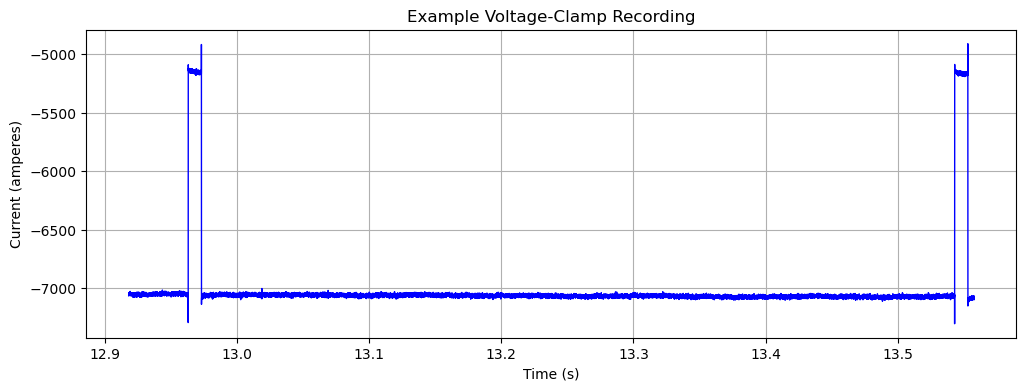

In [3]:
# Plot example voltage-clamp recording
def plot_voltage_clamp_data(series, title):
    data = series.data[:]
    time = np.arange(len(data)) / series.rate + series.starting_time
    
    plt.figure(figsize=(12, 4))
    plt.plot(time, data, 'b-', linewidth=1)
    plt.xlabel('Time (s)')
    plt.ylabel(f'Current ({series.unit})')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Get example voltage clamp recording
vc_series = nwb.acquisition['data_00000_AD0']
plot_voltage_clamp_data(vc_series, 'Example Voltage-Clamp Recording')

## Analyzing Spike Timing
The processing module contains spike timing information for different sweeps.

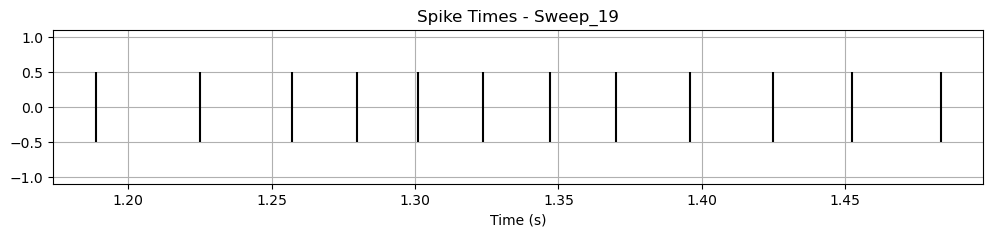

In [4]:
# Plot spike times from an example sweep
def plot_spike_times(sweep):
    spike_times = sweep.timestamps[:]
    
    plt.figure(figsize=(12, 2))
    plt.eventplot(spike_times, lineoffsets=0, linelengths=1, color='black')
    plt.xlabel('Time (s)')
    plt.title(f'Spike Times - {sweep.name}')
    plt.grid(True)
    plt.show()

# Get example sweep with spikes
spikes_module = nwb.processing['spikes']
sweep_19 = spikes_module.data_interfaces['Sweep_19']
plot_spike_times(sweep_19)

## Experimental Epochs

Number of epochs: 3352

Epoch duration statistics (seconds):
count    3352.000000
mean        0.406164
std         2.393813
min         0.000453
25%         0.021827
50%         0.039837
75%         0.124521
max        61.384995
dtype: float64


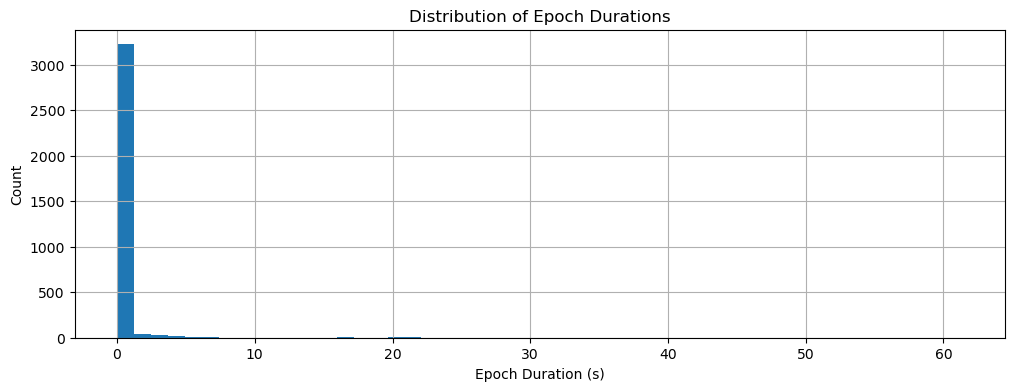

In [5]:
# Convert epochs to DataFrame and show summary
epochs_df = nwb.epochs.to_dataframe()
print(f"Number of epochs: {len(epochs_df)}")
print("\nEpoch duration statistics (seconds):")
durations = epochs_df['stop_time'] - epochs_df['start_time']
print(durations.describe())

# Plot epoch durations
plt.figure(figsize=(12, 4))
plt.hist(durations, bins=50)
plt.xlabel('Epoch Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Epoch Durations')
plt.grid(True)
plt.show()

## Subject Information

In [6]:
# Print subject metadata
print(f"Species: {nwb.subject.species}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Subject ID: {nwb.subject.subject_id}")

Species: Homo sapiens
Age: P21170.0D
Sex: M
Subject ID: 1203384279


## Next Steps
Potential analyses with this dataset:
- Compare spike patterns across different sweeps
- Analyze response properties to different stimulus protocols 
- Investigate cellular properties through voltage-clamp recordings
- Study temporal patterns in experimental epochs